## Read advertising.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats


In [9]:
df = pd.read_csv('advertising.csv', parse_dates=['Timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 78.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Comparing Proportions (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Daily Time Spent on Site.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [27]:
df.Male.value_counts()

0    519
1    481
Name: Male, dtype: int64

0    519
1    481
Name: Male, dtype: int64

In [10]:
df['Clicked on Ad'].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

0    500
1    500
Name: Clicked on Ad, dtype: int64

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

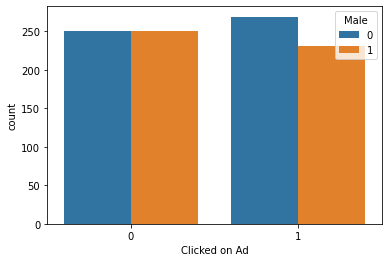

In [12]:
sns.countplot(data=df, x='Clicked on Ad' ,hue='Male')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

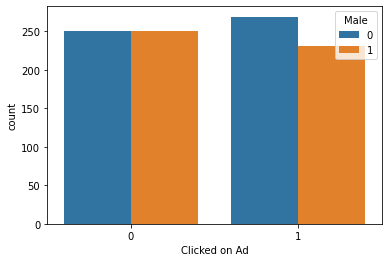

<AxesSubplot:xlabel='Male', ylabel='Clicked on Ad'>

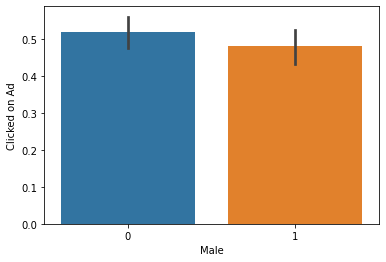

In [22]:
sns.barplot(data=df, x='Male', y='Clicked on Ad')

<AxesSubplot:xlabel='Male', ylabel='Clicked on Ad'>

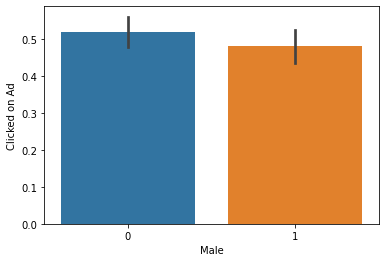

In [47]:
pd.DataFrame(df.groupby('Male')['Clicked on Ad'].count())

,Clicked on Ad
Male,
0,519
1,481


,Clicked on Ad
Male,
0,519
1,481


In [46]:
pd.DataFrame(df.groupby('Male')['Clicked on Ad'].describe()['mean'].rename("Clicked on Ad"))

,Clicked on Ad
Male,
0,0.518304
1,0.480249


,Clicked on Ad
Male,
0,0.518304
1,0.480249


In [81]:
m1 = df[df.Male==0]['Clicked on Ad'].mean()
m2 = df[df.Male==1]['Clicked on Ad'].mean()
mean_diff = m1 - m2
mean_diff
# so the CI mean + margin error 
# mean + 0.95 zscore * std / sqrt(n)
var1 = df[df.Male==0]['Clicked on Ad'].var()
var2 = df[df.Male==1]['Clicked on Ad'].var()
mean_diff - stats.norm.ppf(0.975)*np.sqrt((var1/519) + (var2/481)), mean_diff + stats.norm.ppf(0.975)*np.sqrt((var1/519) + (var2/481))

(-0.023986479497866094, 0.100096382197364)

In [14]:
## CI


Difference in proportion: 0.0383
95% CI: [-0.02367968847313774, 0.10027968847313774]


In [115]:
# so the null hypothises will be that there is no diff so the mean is 0
# z or t = x - 0 / SE
z = (mean_diff - 0) / np.sqrt((var1/519)+(var2/481))
p_value = (1 - stats.norm.cdf(z))*2
z, p_value

(1.2022020295136224, 0.22928526320462161)

In [15]:
## Using Calculation steps


z_score: 1.211170979546546
p_value: 0.2258298825298657


In [87]:
stats.ttest_ind(a=df[df.Male==0]['Clicked on Ad'], b=df[df.Male==1]['Clicked on Ad'])

Ttest_indResult(statistic=1.2022004765958763, pvalue=0.22957103161130843)

In [16]:
## Using scipy.stats.ttest_ind()


Ttest_indResult(statistic=1.2022004765958763, pvalue=0.22957103161130843)

In [ ]:
# p value is large so we can't reject the null
# so ad doesn't differ from both men and women

## Comparing Proportions (CI - Hypothesis Test)
### Check for significance difference between Male and Female in Click on Ad.
### Find the CI for this difference.
### Define and write your null and alternate hypothesis.
### Write your conclusion (Reject/not reject null hypothesis) and explain what does it mean (there is significance difference or not).
### Solve using the calculation steps and confirm using "scipy.stats.ttest_ind()"

In [97]:
df.Male.value_counts()

0    519
1    481
Name: Male, dtype: int64

0    519
1    481
Name: Male, dtype: int64

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

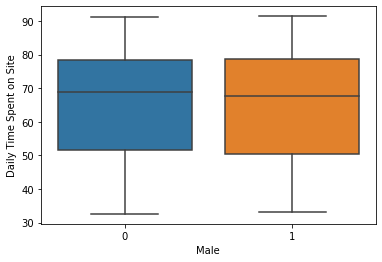

In [99]:
sns.boxplot(data=df, x='Male', y='Daily Time Spent on Site')

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

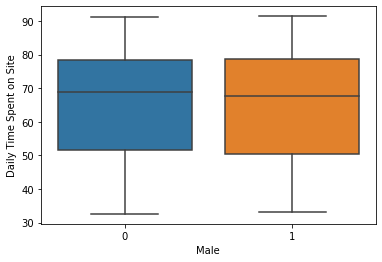

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

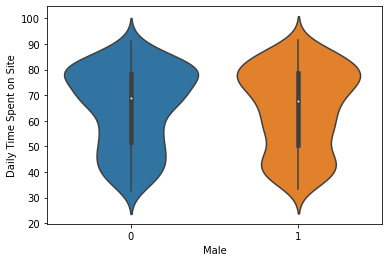

In [107]:
sns.violinplot(data=df, x='Male', y='Daily Time Spent on Site')

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

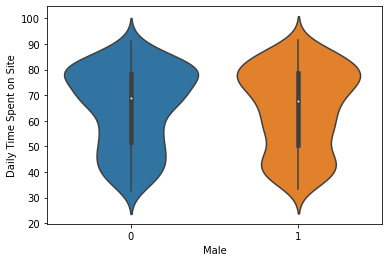

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

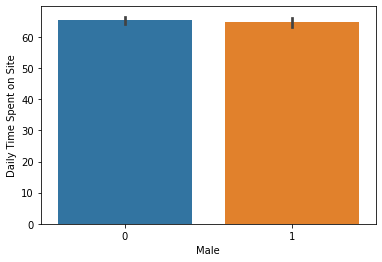

In [108]:
sns.barplot(data=df, x='Male', y='Daily Time Spent on Site')

<AxesSubplot:xlabel='Male', ylabel='Daily Time Spent on Site'>

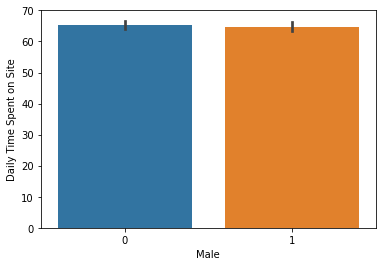

In [110]:
pd.DataFrame(df.groupby('Male')['Daily Time Spent on Site'].mean())

,Daily Time Spent on Site
Male,
0,65.289287
1,64.688274


,Daily Time Spent on Site
Male,
0,65.289287
1,64.688274


,Daily Time Spent on Site
Male,
0,15.623040
1,16.109163


In [5]:
m1 = df[df.Male==0]['Daily Time Spent on Site'].mean()
m2 = df[df.Male==1]['Daily Time Spent on Site'].mean()
mean_diff = m1 - m2
print(mean_diff)
# so the CI mean + margin error 
# mean + 0.95 zscore * std / sqrt(n)
var1 = df[df.Male==0]['Daily Time Spent on Site'].var()
var2 = df[df.Male==1]['Daily Time Spent on Site'].var()
mean_diff - stats.t.ppf(0.975, df=935)*np.sqrt((var1/519) + (var2/481)), mean_diff + stats.t.ppf(0.975,df=935)*np.sqrt((var1/519) + (var2/481))

0.6010126622843757


(-1.371084121435002, 2.5731094460037536)

In [25]:
## CI

Difference in mean: 0.6010129999999947
95% CI: [-1.3709224295437132, 2.5729484295437026]


In [124]:
# so the null hypothises will be that there is no diff so the mean is 0
# z or t = x - 0 / SE
z = (mean_diff - 0) / np.sqrt((var1/519)+(var2/481))
p_value = (1 - stats.t.cdf(z,df=998))*2
z, p_value

(0.5980893061459008, 0.5499160431131624)

In [26]:
## Using Calculation steps


t_score: 0.5980896455209542
p_value: 0.5499158167679443


In [125]:
stats.ttest_ind(a=df[df.Male==0]['Daily Time Spent on Site'], b=df[df.Male==1]['Daily Time Spent on Site'])

Ttest_indResult(statistic=0.5987865950462051, pvalue=0.5494510852945214)

In [27]:
## Using scipy.stats.ttest_ind()


Ttest_indResult(statistic=0.5987865950462051, pvalue=0.5494510852945214)

In [ ]:
# p value is large so we can't reject the null
# so time spent doesn't differ from both men and women

## Paired t-test
### Check for significant difference in Daily Time Spent on Site in April and May.
### Solve using the calculation steps and confirm using "scipy.stats.ttest_rel()"
### Write your conclusion.

In [10]:
df['Timestamp'].dt.month.value_counts()

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: Timestamp, dtype: int64

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month, dtype: int64

In [13]:
df['month'] = df['Timestamp'].dt.month

In [18]:
df[['month', 'Daily Time Spent on Site']].head()

,month,Daily Time Spent on Site
0,3,68.95
1,4,80.23
2,3,69.47
3,1,74.15
4,6,68.37


,month,Daily Time Spent on Site
0,3,68.95
1,4,80.23
2,3,69.47
3,1,74.15
4,6,68.37


In [50]:
# I want to get the differene in april and may 4, 5
# so the null will be thar there is no diff between the 2 months
april_df = df[df.month==4]['Daily Time Spent on Site']
may_df = df[df.month==5]['Daily Time Spent on Site']
diff_df = april_df.values - may_df.values
mean = diff_df.mean()
var = diff_df.std(ddof=1)
l = len(diff_df)
t_Score =  (mean - 0) / (var/np.sqrt(l))
p_value = 1 - stats.t.cdf(t_Score, df=l-1)
t_Score, p_value * 2


(0.9059345312437999, 0.36646315120526873)

In [40]:
# Using Steps


t_score: 0.9059345312437999
p_value: 0.36646315120526873


In [48]:
stats.ttest_rel(a=april_df, b=may_df)

Ttest_relResult(statistic=0.9059345312438, pvalue=0.36646315120526884)

In [41]:
# using ttest_rel

Ttest_relResult(statistic=0.9059345312438, pvalue=0.36646315120526884)

In [ ]:
# p value is large so we can't reject the null
# so time spent has no diff in may and april

## Chi-Squared Distribution    (Bonus Exercise)
### Draw 10 different random sample of size = 1000 from standard normal distribution.
### Derive a Chi-square distribution of k=1,2,....10 using these samples.
### Plot your results.
### Compare with the one from scipy.stats.chi2()
### You can also compare with the one from np.random.chisquare()

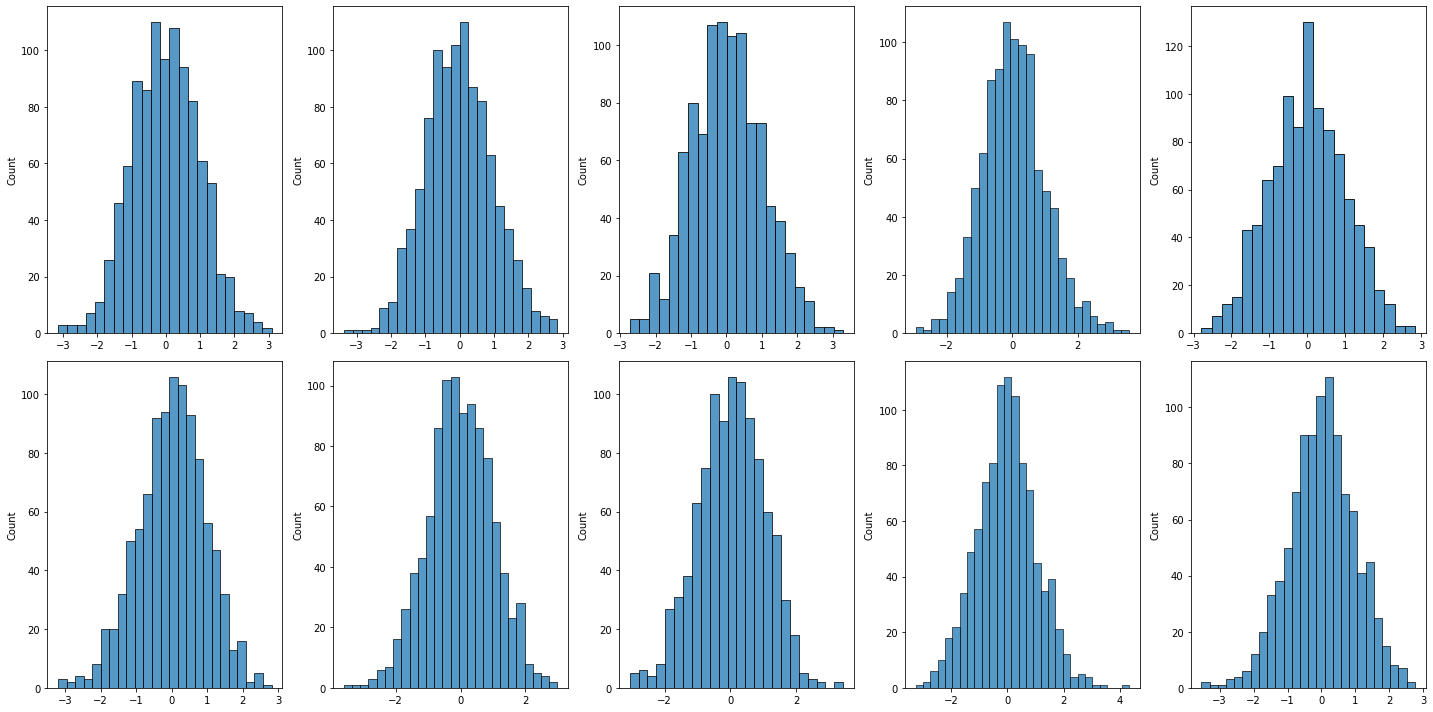

In [60]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
axes = ax.flatten()
for i in range(10):
    sns.histplot(np.random.normal(loc=0, scale=1, size=1000),ax=axes[i])
plt.tight_layout()

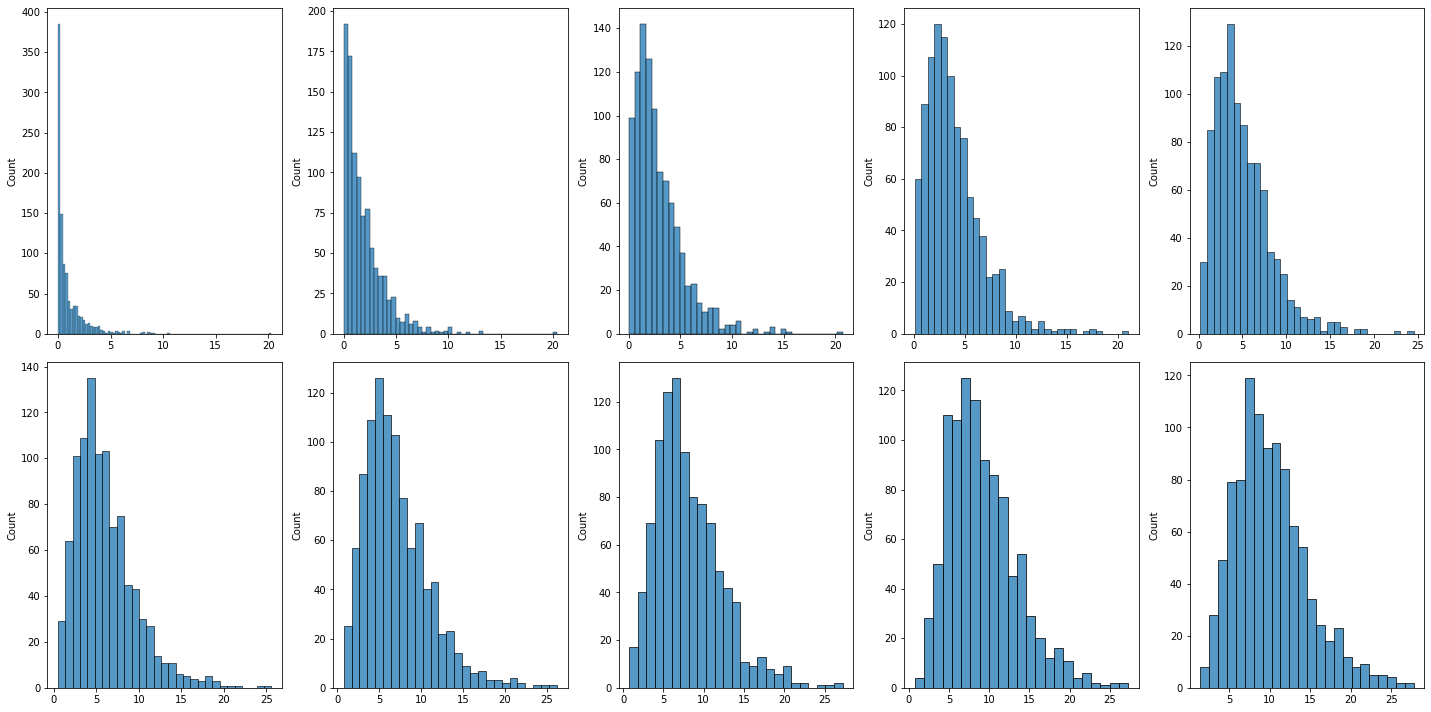

In [77]:
fig, ax = plt.subplots(2,5,figsize=(20,10))
axes = ax.flatten()
prev = 0
for i in range(10):
    k = i + 1
    dis = np.square(np.random.normal(loc=0, scale=1, size=1000))
    sns.histplot((dis + prev),ax=axes[i])
    prev = dis + prev
plt.tight_layout()

In [ ]:
stats.chi2()

## Chi-square goodness of fit
### Create a new column that contain the month.
### Check if all existing months are equally distributed.
### Confirm using from scipy.stats.chisquare()

In [78]:
df.month.value_counts()

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month, dtype: int64

2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

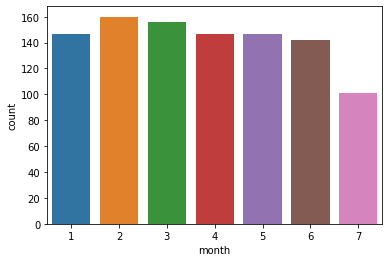

In [79]:
sns.countplot(data=df, x='month')

<AxesSubplot:xlabel='month', ylabel='count'>

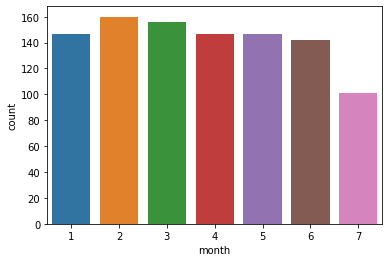

In [111]:
observed_frequencies = df["month"].value_counts().sort_index().values
total_count = len(df)
expected_proportions = [1/7] * 7
expected_frequencies = [prop * total_count for prop in expected_proportions]
expected_frequencies

[142.85714285714286,
 142.85714285714286,
 142.85714285714286,
 142.85714285714286,
 142.85714285714286,
 142.85714285714286,
 142.85714285714286]

In [134]:
score = np.sum((observed_frequencies - expected_frequencies)**2/expected_frequencies)
1 - stats.chi2.cdf(score, df=6)


0.01432319742349919

In [46]:
# using steps

Chi_Square_Score: 15.896
p-value: 0.01432319742349919


In [192]:
chi2, p_value = stats.chisquare(observed_frequencies,142.85714285714286)
chi2, p_value

(15.896, 0.01432319742349924)

In [47]:
# using chisquare


Chi_Square_Score: 15.896
p-value: 0.01432319742349924


In [ ]:
# we reject the null
# and we conclude months has diffrent distirbtion

## Chi-square test of independence
### Check if there is a significant relation between "Clicked on Ad" and "month".
### Use from scipy.stats.chi2_contingency() only.
### Write your conclusion

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

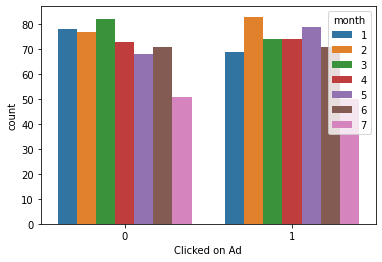

In [137]:
sns.countplot(data=df, x='Clicked on Ad', hue='month')

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

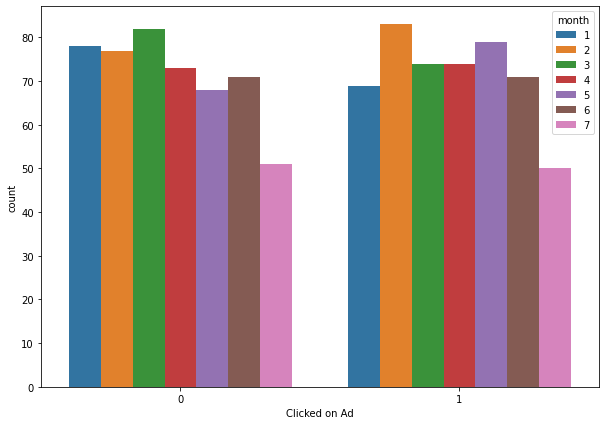

In [159]:
v = df.groupby(['month', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()
v

Clicked on Ad,0,1
month,,
1,78,69
2,77,83
3,82,74
4,73,74
5,68,79
6,71,71
7,51,50


Clicked on Ad,0,1
month,,
1,78,69
2,77,83
3,82,74
4,73,74
5,68,79
6,71,71
7,51,50


<AxesSubplot:xlabel='Clicked on Ad', ylabel='month'>

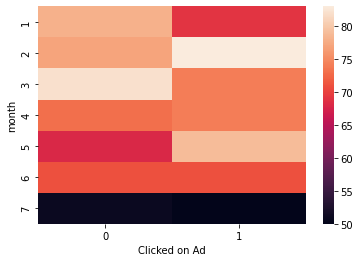

In [153]:
sns.heatmap(data=v)

In [160]:
stats.chi2_contingency(v)

(2.026109781307801,
 0.9172816839796131,
 6,
 array([[73.5, 73.5],
        [80. , 80. ],
        [78. , 78. ],
        [73.5, 73.5],
        [73.5, 73.5],
        [71. , 71. ],
        [50.5, 50.5]]))

Expected:
[[73.5 73.5]
 [80.  80. ]
 [78.  78. ]
 [73.5 73.5]
 [73.5 73.5]
 [71.  71. ]
 [50.5 50.5]]
Chi_Square_Score: 2.026109781307801
p-value: 0.9172816839796131
dof: 6


In [ ]:
# we can't reject the null
# so ad doesn't differ from months

## F Distribution (Bonus)
### Generate different F distributions from different Chai distributions using np.random.chisquare().
### Compare with scipy.stats.f()

## ANOVA
### Create a new column that identifies age groups (young,adult,old).
### Check if the age group affects the Daily Time Spent on Site.
### Use only scipy.stats.f_oneway()
### Write your conclusion.

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

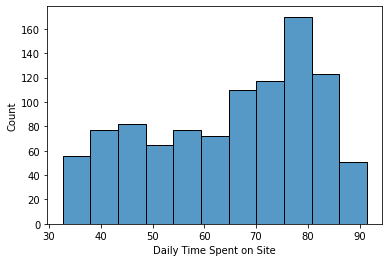

In [162]:
sns.histplot(data=df, x='Daily Time Spent on Site')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

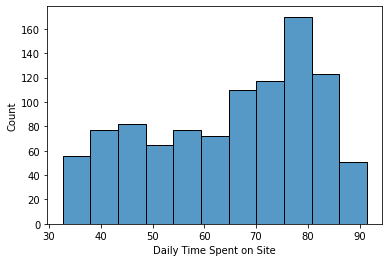

<AxesSubplot:xlabel='Age', ylabel='Count'>

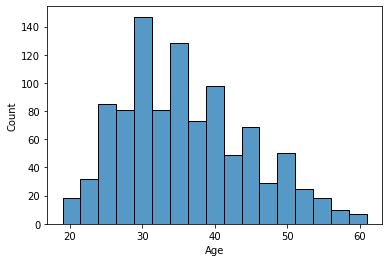

In [164]:
sns.histplot(data=df, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

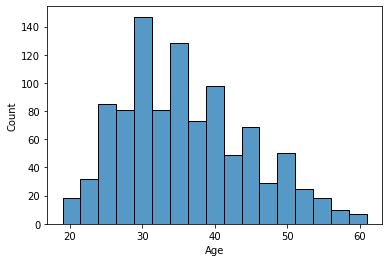

<AxesSubplot:xlabel='Age', ylabel='count'>

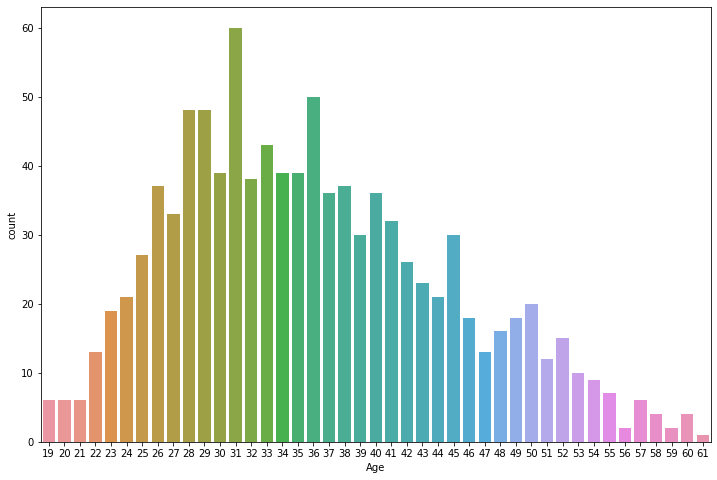

In [168]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Age')

<AxesSubplot:xlabel='Age', ylabel='count'>

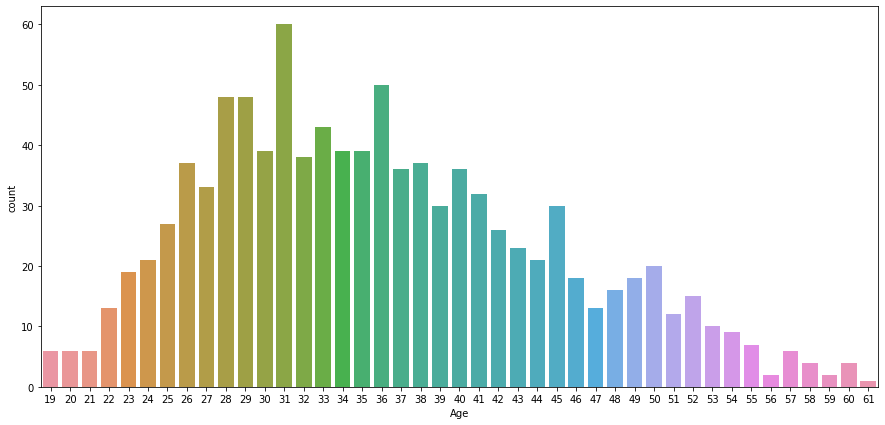

In [169]:
df.Age.value_counts()

31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

31    60
36    50
28    48
29    48
33    43
35    39
30    39
34    39
32    38
26    37
38    37
37    36
40    36
27    33
41    32
45    30
39    30
25    27
42    26
43    23
44    21
24    21
50    20
23    19
46    18
49    18
48    16
52    15
47    13
22    13
51    12
53    10
54     9
55     7
20     6
21     6
57     6
19     6
60     4
58     4
56     2
59     2
61     1
Name: Age, dtype: int64

In [174]:
df.Age.value_counts().sort_index().cumsum()

19       6
20      12
21      18
22      31
23      50
24      71
25      98
26     135
27     168
28     216
29     264
30     303
31     363
32     401
33     444
34     483
35     522
36     572
37     608
38     645
39     675
40     711
41     743
42     769
43     792
44     813
45     843
46     861
47     874
48     890
49     908
50     928
51     940
52     955
53     965
54     974
55     981
56     983
57     989
58     993
59     995
60     999
61    1000
Name: Age, dtype: int64

In [183]:
# 33 47
df['Age_bin'] = pd.cut(df.Age, [0,33,47,100], labels=['young', 'adult', 'old'])
pd.cut(df.Age, [0,33,47,100], labels=['young', 'adult', 'old']).value_counts()

young    444
adult    430
old      126
Name: Age, dtype: int64

Young    444
Adult    430
Old      126
Name: AgeGroups, dtype: int64

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  month                     1000 non-null   int64         
 11  Age_bin                   1000 non-null   category      
dtypes: category(1), datet

<AxesSubplot:xlabel='Age_bin', ylabel='count'>

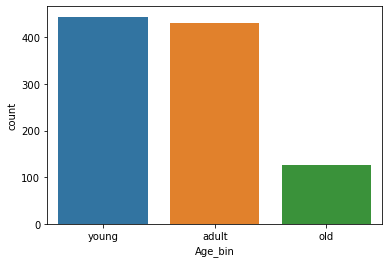

In [186]:
sns.countplot(data=df, x='Age_bin')

<AxesSubplot:xlabel='AgeGroups', ylabel='count'>

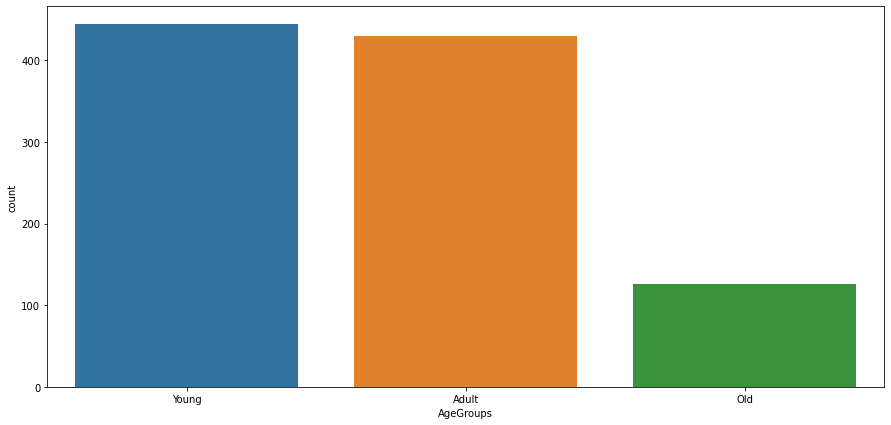

<AxesSubplot:xlabel='Age_bin', ylabel='Daily Time Spent on Site'>

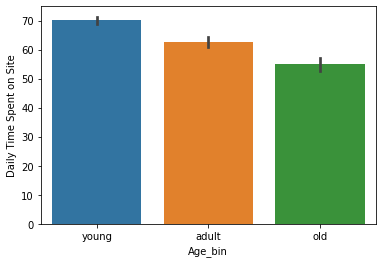

In [189]:
sns.barplot(data=df, x='Age_bin', y='Daily Time Spent on Site')

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

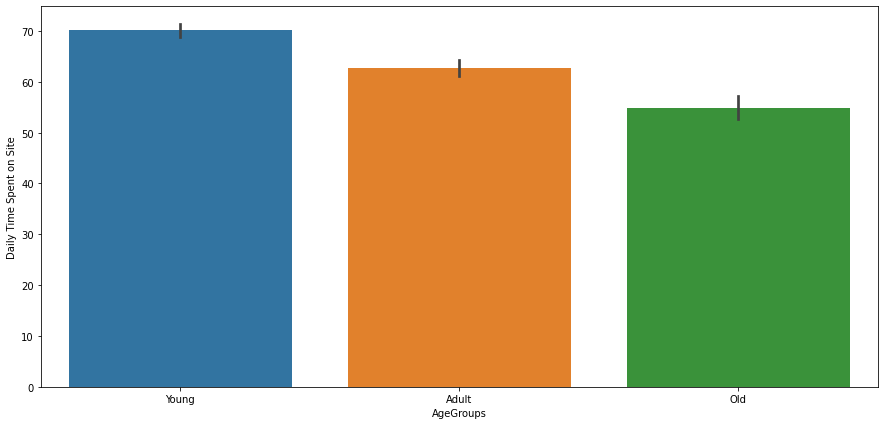

<AxesSubplot:xlabel='Age_bin', ylabel='Daily Time Spent on Site'>

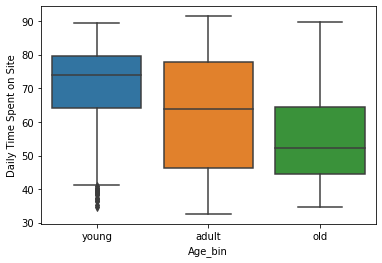

In [191]:
sns.boxplot(data=df, x='Age_bin', y='Daily Time Spent on Site')

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

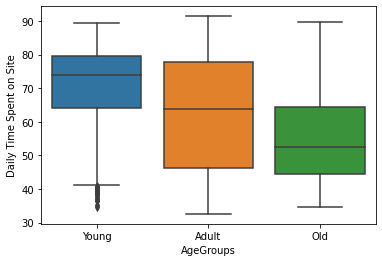

<AxesSubplot:xlabel='Age_bin', ylabel='Daily Time Spent on Site'>

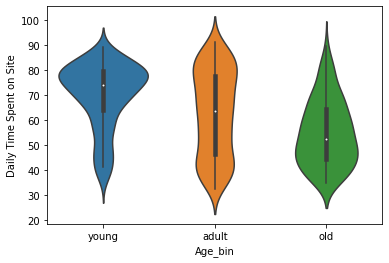

In [193]:
sns.violinplot(data=df, x='Age_bin', y='Daily Time Spent on Site')

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

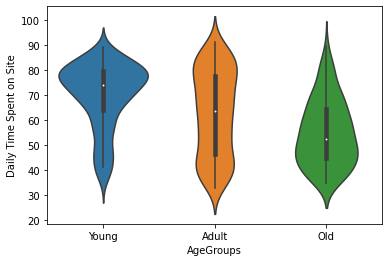

<AxesSubplot:xlabel='Age_bin', ylabel='Daily Time Spent on Site'>

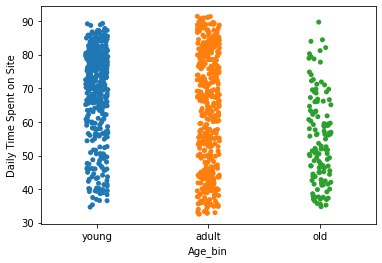

In [194]:
sns.stripplot(data=df, x='Age_bin', y='Daily Time Spent on Site')

<AxesSubplot:xlabel='AgeGroups', ylabel='Daily Time Spent on Site'>

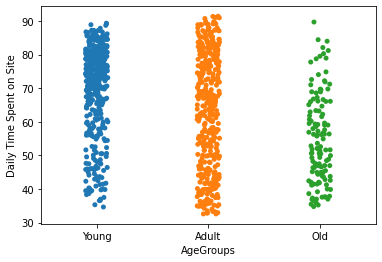

In [196]:
stats.f_oneway(df[df.Age_bin=='young']['Daily Time Spent on Site'],df[df.Age_bin=='adult']['Daily Time Spent on Site']
               ,df[df.Age_bin=='old']['Daily Time Spent on Site'])

F_onewayResult(statistic=59.26824116449695, pvalue=4.77389772073441e-25)

#### we reject the null hypothies so we conclude that bin_age has effect on the daily spent time

F-score: 59.26824116449695
p-value: 4.77389772073441e-25
